# 1. Introduction

**Objective - Create Artificial Data:** In this project I have artificially created datasets with the objective to closely resemble actual crypto-currency data from financial apps and/or digital wallets. Let us assume that a hypothetical company has decided to rollout one or more modules in its app and is trying to understand the impact of these new modules on the users, transaction frequency, transaction amount, complications with new modules, etc.

**Inspiration:** Several real financial datasets were used as inspiration for this project in order to understand the schema, data range, data types, and underlying patterns of users and transactions.

**Randomization and manipulation:** However, *there is absolutely no similarity with the actual, real projects*. User IDs and Trading IDs have been randomized, and the data patterns have been manipulated to give the perception of real fluctuations.

**Limitations:** Please note that this project is for illustration purposes and in no way offers any actual customer information. There are still a few limitations in the data ranges and patterns which have been intentionally left in the code and will merit additional examination. 

# 2. Overview of objectives

**Key Objective:** *Create two datasets, one prior and one after the introduction of new financial modules in a hypothetical financial platform. These datasets can be used as training to run t-tests/AB tests for measure effects, ETL processes, data manipulation and standardization, user clustering among other modelling or statistical tests.*

**Rundown of specific operational objectives:**

- **Privacy:** Create artificial datasets featuring cryptocurrencies that resemble but do not have any tangible similarity with actual datasets. No real identifiers are to be presented in order to prevent data aggregation to determine customer identity.
- **Hypothetical app - two timeframes:** The two datasets need to represent two different time periods: one before and one after the introduction of several hypothetical application modules in a crypto financial app (the natural of the modules themselves is not the objective, they could functional, operational, cosmetic, added functionality between frontend and backend databases, etc.) 
- **Real cryptonames - artificial data:** The data must feature real cryptocurrency names and modest, realistic values (e.g. not 100k of Bitcoin)
- **Realistic variables:** The data must resemble variables found in financial apps, this includes phase one/two or leg one/two transactions, randomized user IDs, transaction IDs, etc.The data must feature a few "quirks" that make them realistic, be it problems, flaws, or feature a few incidents that need to be addressed (especially in the second, post-module dataset). However, they should not feature any outliers (at least in this first version).

# 3. Generating Pre-Module Dataset

## 3.1 Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## 3.2 Choosing Variables

I have chosen the following variables/columns/features to be present in each dataset:
- trade_id: shows the transaction ID, it a unique column that can also function as a unique identifier in SQL databases if needed
- user_id: shows the user ID, there must be several similar user IDs in the each dataset but also in-between datasets, but also allow several hypothetical users to "leave" the app after the modules have been introduced to simulate more realistic data
- conf_date: stands for Confirmation Date, which is the date of confirmation for the initial transaction
- leg 1 and 2 (type, amount, conf_status): Leg One and Leg Two are standard terms in financial apps and stand for the initial and secondary transaction process in the app. Leg_1_type illustrates the type of cryptocurrency (i.e. name), leg_1_amount illustrates the amount of each crypto traded/invested, leg_1_conf_status illustrates the outcomes of the transaction (I have choosen three to be featured: confirmed, pending, declined). Similar options must exist for the leg_2 variable.    

## 3.3 Generating dataset

This dataframe depicts the business-as-usual status of the financial app, prior to the introduction of the new hypothetical app module/modules.

In [5]:
# Pre-Module Dataframe

# Define several cryptocurrency names and their associated amount ranges
crypto_names = {
    'Monero': (5.5, 113.7),
    'Gnosis': (5.5, 113.7),
    'Litecoin': (5.5, 113.7),
    'Illuvium': (5.5, 113.7),
    'GMX': (5.5, 113.7),
    'LINK': (3.1, 205.2),
    'Kusama': (3.1, 205.2),
    'Solana': (3.1, 205.2),
    'Compound': (3.1, 205.2),
    'Bitcoin SV': (3.1, 205.2),
    'Ethereum Classic': (8.4, 145.2),
    'Avalanche': (8.4, 145.2),
    'IOTA': (8.4, 145.2),
    'Neo': (8.4, 145.2),
    'GateToken': (8.4, 145.2)
}

# Define the number of users and their corresponding number of transactions
NUM_USERS = 140
# number of users with 5 or more transactions = 33
# number of users with 10 or more transactions = 40

# Define the start and end dates for the transaction execution dates
START_DATE = datetime(2022, 1, 1)
END_DATE = datetime(2022, 6, 29)

# Generate the user IDs
user_ids = []
for i in range(NUM_USERS):
    user_ids.append(str(random.randint(333, 1000)) + ''.join(random.choices(string.ascii_lowercase, k=8)))

# Generate the trade IDs and associated data
trade_data = []
for user_id in user_ids:
    num_txns = 1
    if random.randint(1, 100) <= 33:
        num_txns = random.randint(5, 9)
    elif random.randint(1, 100) <= 40:
        num_txns = random.randint(10, 20)
        
    for i in range(num_txns):
        trade_id = str(random.randint(444, 1000)) + ''.join(random.choices(string.ascii_letters + string.digits, k=10))
        confirmation_date = START_DATE + timedelta(days=random.randint(0, (END_DATE - START_DATE).days))
        
        leg1_type = random.choice(list(crypto_names.keys()))
        leg1_amount = round(random.uniform(*crypto_names[leg1_type]), 2)
        leg1_conf_categories = ['confirmed', 'pending', 'declined']
        leg1_conf_weights = [0.85,0.1,0.05]
        leg1_conf_status = random.choices(leg1_conf_categories, weights = leg1_conf_weights)[0]
        
        # Choose a different crypto type for leg 2 that wasn't used in leg 1
        leg2_type = random.choice([ct for ct in crypto_names.keys() if ct != leg1_type])
        leg2_amount = round(random.uniform(*crypto_names[leg2_type]), 2)
                
               
        trade_data.append({
            'trade_id': trade_id,
            'user_id': user_id,
            'conf_date': confirmation_date.strftime('%Y-%m-%d'),
            'leg_1_type': leg1_type,
            'leg_1_amount': leg1_amount,
            'leg_1_conf_status': leg1_conf_status,
            'leg_2_type': leg2_type,
            'leg_2_amount': 'Unknown',
            'leg_2_conf_status': leg1_conf_status})

df_pre_mod = pd.DataFrame(trade_data)

# Define leg_2 confirmation status
df_pre_mod['leg_2_conf_status'] = df_pre_mod['leg_1_conf_status']
leg_2_weights = [0.90,0.08,0.02]
leg_2_categories = ['confirmed','pending','declined']

for i, status in enumerate(df_pre_mod['leg_2_conf_status']):
    if status == 'confirmed':
        new_status = random.choices(leg_2_categories, weights=leg_2_weights)[0]
        df_pre_mod.at[i, 'leg_2_conf_status'] = new_status

# 4. Generating Post-Module Dataset

Note that the schema and column structure remains the same in the post-module dataset.

## 4.1 Generating dataset

In [6]:
# Dataframe 2 - after the introduction of the app modules

import random
import string
from datetime import datetime, timedelta

# Define the cryptocurrencies and their associated amount ranges

crypto_names_post = {name: (round(value[0]*1.35,3), value[1]*1.35) for name, value in crypto_names.items()}

# Define the number of users and their corresponding number of transactions
NUM_USERS = 185
# number of users with 5 or more transactions = 55
# number of users with 10 or more transactions = 36

# Define the start and end dates for the transaction execution dates
START_DATE = datetime(2022, 7, 1)
END_DATE = datetime(2022, 11, 28)

# Generate the user IDs
user_ids = []
for i in range(NUM_USERS):
    user_ids.append(str(random.randint(444, 1500)) + ''.join(random.choices(string.ascii_lowercase, k=8)))

# Generate the trade IDs and associated data
trade_data = []
for user_id in user_ids:
    num_txns = 1
    if random.randint(1, 100) <= 55:
        num_txns = random.randint(4, 14)
    elif random.randint(1, 100) <= 37:
        num_txns = random.randint(10, 30)
        
    for i in range(num_txns):
        trade_id = str(random.randint(333, 1000)) + ''.join(random.choices(string.ascii_letters + string.digits, k=10))
        exec_date = START_DATE + timedelta(days=random.randint(0, (END_DATE - START_DATE).days))
        
        # I am manually adjusting the weights in order to show various levels of inconsistencies after the module introduction
        leg1_type = random.choice(list(crypto_names_post.keys()))
        leg1_amount = round(random.uniform(*crypto_names_post[leg1_type]), 2)
        leg1_conf_categories = ['confirmed', 'pending', 'declined']
        leg1_conf_weights = [0.75,0.15,0.1]
        leg1_conf_status = random.choices(leg1_conf_categories, weights = leg1_conf_weights)[0]
        
        leg2_type = random.choice([ct for ct in crypto_names_post.keys() if ct != leg1_type])
        leg2_amount = round(random.uniform(*crypto_names_post[leg2_type]), 2)
        
        
        trade_data.append({
            'trade_id': trade_id,
            'user_id': user_id,
            'conf_date': exec_date.strftime('%Y-%m-%d'),
            'leg_1_type': leg1_type,
            'leg_1_amount': leg1_amount,
            'leg_1_conf_status': leg1_conf_status,
            'leg_2_type': leg2_type,
            'leg_2_amount': 'Unknown'})

df_post_mod = pd.DataFrame(trade_data)

# Define leg_2 confirmation status
df_post_mod['leg_2_conf_status'] = df_post_mod['leg_1_conf_status']
leg_2_weights = [0.75,0.15,0.1]
leg_2_categories = ['confirmed','pending','declined']

for i, status in enumerate(df_post_mod['leg_2_conf_status']):
    if status == 'confirmed':
        new_status = random.choices(leg_2_categories, weights=leg_2_weights)[0]
        df_post_mod.at[i, 'leg_2_conf_status'] = new_status

# 5. Maintaining User ID continuation between dataframes

In order to maintain certain users in the pre-module and post-module datasets we will need to select, duplicate, and inject certain user IDs from the pre-mod df to the post-mod df.

First, let us check if there are any duplicate values between our two dfs up until this point.

In [7]:
is_duplicate_user = df_post_mod['user_id'].isin(df_pre_mod['user_id'])

if is_duplicate_user.any():
    print("--> There are duplicate user ID values between the two dataframes.")
else:
    print("--> No duplicate user ID values found between the two dataframes.")

--> No duplicate user ID values found between the two dataframes.


No duplicate User IDs found, meaning that 1) our randomization process worked, and that 2) we need to inject a few user IDs to our second dataset. Why do we need to perform this step? Because otherwise we will have absolutely no similar user IDs between our two dfs. Which, in practice, would mean that the very moment the new modules were introduced in the app there would not be a single original user that still used that app! That would not be very realistic now would it? Imagine if every time your favorite software plaform is updated, all users are purged from the system are only new users are allowed to register again.

We can solve this problem by slicing our two datasets, select several indeces and then infusing them.

Please note that while this would have been easier if I randomized the *selection of the indeces* it would obviously be... random, and therefore would not allow for the specific selection of various strata. By using a naturally sorted .value_counts() command, I can slice through specific stata, i.e. various levels of transactions.

Refer to the example below. User IDs at the top have the highest frequency of transactions, while those at the bottom hold the least.

In [8]:
# Showcasing the value counts of user IDs
df_pre_mod['user_id'].value_counts()

392bdwuqqjp    20
971ojgfwhvl    20
923pqjhalxe    20
431hlzcigab    20
989qohllwgh    20
               ..
665ncfnldef     1
739byidylzt     1
427fypfvstl     1
726yubpmytv     1
840xsvnxemj     1
Name: user_id, Length: 140, dtype: int64

We can now slice this pandas Series, extract a few indices, and use it to infuse our second df.

In [9]:
# slicing index for pre-mod users
# we will then paste it to post-mod users in order to preserve certain same users (i.e. user_id)
# This will also allow us to run various test statistics if needed

list_users_pre = df_pre_mod['user_id'].value_counts()

s1 = list_users_pre[0:5]
s2 = list_users_pre[10:15]
s3 = list_users_pre[25:35]
s4 = list_users_pre[40:45]
s5 = list_users_pre[60:65]
s6 = list_users_pre[75:85]

total_list_users_pre = pd.concat(objs=[s1, s2, s3, s4, s5, s6])

total_list_users_pre = total_list_users_pre.index

We now perform a similar operation for the post-module users

In [10]:
# post-mod users

list_users_post = df_post_mod['user_id'].value_counts()

s1 = list_users_post[0:5]
s2 = list_users_post[10:15]
s3 = list_users_post[25:35]
s4 = list_users_post[40:45]
s5 = list_users_post[60:65]
s6 = list_users_post[75:85]

total_list_users_post = pd.concat(objs=[s1, s2, s3, s4, s5, s6])

total_list_users_post = total_list_users_post.index

Then finally merge them together to simulate user continuation between timeframes.

In [11]:
df_post_mod['user_id'] = df_post_mod['user_id'].replace(total_list_users_post, total_list_users_pre)

Now let us test this operation once again and make sure there are multiple values this time.

In [12]:
is_duplicate_user = df_post_mod['user_id'].isin(df_pre_mod['user_id'])

if is_duplicate_user.any():
    print("--> There are duplicate user ID values between the two dataframes.")
else:
    print("--> No duplicate user ID values found between the two dataframes.")

--> There are duplicate user ID values between the two dataframes.


Index infusion completed.

Our two dataframes are now ready for a basic overview.

# 6. Dataframe Overview

## 6.1 Pre-Module Overview

In [13]:
df_pre_mod.head()

,trade_id,user_id,conf_date,leg_1_type,leg_1_amount,leg_1_conf_status,leg_2_type,leg_2_amount,leg_2_conf_status
0,752IUzHrh3FQu,838xgsinqnn,2022-04-24,Solana,194.62,confirmed,Bitcoin SV,Unknown,confirmed
1,659PzkJ2qpw7y,838xgsinqnn,2022-01-09,Litecoin,55.43,confirmed,Compound,Unknown,confirmed
2,879KNMizmmGOw,838xgsinqnn,2022-06-15,IOTA,135.78,confirmed,Neo,Unknown,confirmed
3,572c18Mof5zwE,838xgsinqnn,2022-03-16,GateToken,84.12,confirmed,Avalanche,Unknown,confirmed
4,93019AWXhWxjV,838xgsinqnn,2022-01-04,GMX,112.68,confirmed,IOTA,Unknown,confirmed


In [14]:
numb_NA_vals = df_pre_mod.isna().sum()
NA_vals_percentage = round(numb_NA_vals/len(df_pre_mod)*100, 2)

df_NA = pd.DataFrame({
    'Data Types': df_pre_mod.dtypes,
    'Unique Values': df_pre_mod.nunique(),
    "Number of NA Values": numb_NA_vals,
    "%Perc of NA Values": NA_vals_percentage
})
print("\nPre-Module:")
df_NA.sort_values(by='Unique Values', ascending = False)


Pre-Module:


,Data Types,Unique Values,Number of NA Values,%Perc of NA Values
trade_id,object,898,0,0.0
leg_1_amount,float64,876,0,0.0
conf_date,object,178,0,0.0
user_id,object,140,0,0.0
leg_1_type,object,15,0,0.0
leg_2_type,object,15,0,0.0
leg_1_conf_status,object,3,0,0.0
leg_2_conf_status,object,3,0,0.0
leg_2_amount,object,1,0,0.0


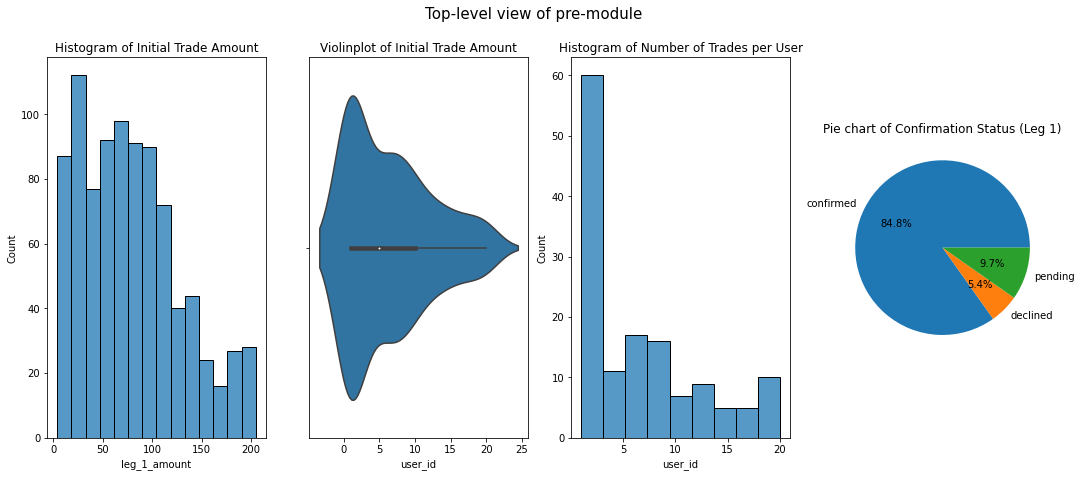

In [15]:
fig, ax = plt.subplots(1,4,figsize=(18,7))

x1 = df_pre_mod['leg_1_amount']
x2 = df_pre_mod['user_id'].value_counts()
x3 = df_pre_mod.groupby(['leg_1_conf_status']).sum()

sns.histplot(data=df_pre_mod, x=x1, ax=ax[0]).set(title="Histogram of Initial Trade Amount")
sns.violinplot(data=df_pre_mod, x=x2, ax=ax[1]).set(title="Violinplot of Initial Trade Amount")
sns.histplot(data=df_pre_mod, x=x2, ax=ax[2]).set(title="Histogram of Number of Trades per User")

# Adding Pie chart
ax[3].pie(x=x3.values.flatten(), labels=x3.index, autopct='%1.1f%%')
ax[3].set_title("Pie chart of Confirmation Status (Leg 1)")

fig.suptitle("Top-level view of pre-module", size = 15)
plt.show()

## 6.2 Post-Module Overview

In [16]:
df_post_mod.head()

,trade_id,user_id,conf_date,leg_1_type,leg_1_amount,leg_1_conf_status,leg_2_type,leg_2_amount,leg_2_conf_status
0,920DNSTJbq2R8,458mwkdzdar,2022-08-22,GateToken,35.18,confirmed,Solana,Unknown,declined
1,342dkHmfGZT6g,458mwkdzdar,2022-11-04,GMX,64.26,confirmed,LINK,Unknown,declined
2,687c5VzTNsDLA,458mwkdzdar,2022-11-15,Monero,73.24,confirmed,LINK,Unknown,confirmed
3,906atRwWbkgeW,458mwkdzdar,2022-09-24,Monero,124.02,pending,Avalanche,Unknown,pending
4,454XERmKadTH7,458mwkdzdar,2022-08-31,Kusama,264.79,confirmed,Litecoin,Unknown,confirmed


In [17]:
numb_NA_vals = df_post_mod.isna().sum()
NA_vals_percentage = round(numb_NA_vals/len(df_pre_mod)*100, 2)

df_NA = pd.DataFrame({
    'Data Types': df_post_mod.dtypes,
    'Unique Values': df_post_mod.nunique(),
    "Number of NA Values": numb_NA_vals,
    "%Perc of NA Values": NA_vals_percentage
})
print("\nPost-Module:")
df_NA.sort_values(by='Unique Values', ascending = False)


Post-Module:


,Data Types,Unique Values,Number of NA Values,%Perc of NA Values
trade_id,object,1519,0,0.0
leg_1_amount,float64,1456,0,0.0
user_id,object,185,0,0.0
conf_date,object,151,0,0.0
leg_1_type,object,15,0,0.0
leg_2_type,object,15,0,0.0
leg_1_conf_status,object,3,0,0.0
leg_2_conf_status,object,3,0,0.0
leg_2_amount,object,1,0,0.0


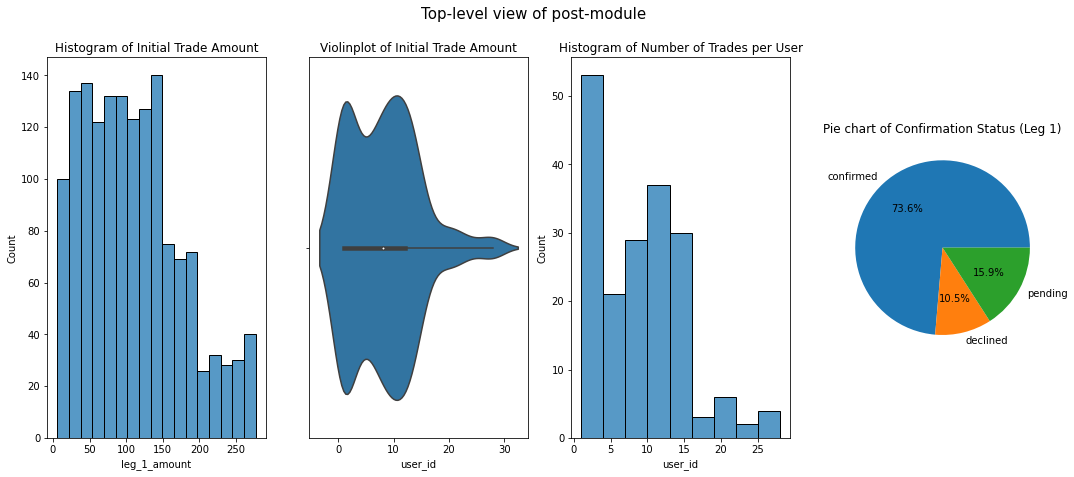

In [19]:
fig, ax = plt.subplots(1,4,figsize=(18,7))

x1 = df_post_mod['leg_1_amount']
x2 = df_post_mod['user_id'].value_counts()
x3 = df_post_mod.groupby(['leg_1_conf_status']).sum()

sns.histplot(data=df_post_mod, x=x1, ax=ax[0]).set(title="Histogram of Initial Trade Amount")
sns.violinplot(data=df_post_mod, x=x2, ax=ax[1]).set(title="Violinplot of Initial Trade Amount")
sns.histplot(data=df_post_mod, x=x2, ax=ax[2]).set(title="Histogram of Number of Trades per User")

# Adding Pie chart
ax[3].pie(x=x3.values.flatten(), labels=x3.index, autopct='%1.1f%%')
ax[3].set_title("Pie chart of Confirmation Status (Leg 1)")

fig.suptitle("Top-level view of post-module", size = 15)
plt.show()

This concludes the synthetic data overview in this python notebook. Although utilizing real datasets is by far superior to artificially generated ones, this notebook aimed to provide a foundation for analysts looking for sample financial app data with a focus towrads cryptocurrencies, user churn, and transaction optimization. 

Follow-up projects will elaborate on methodology for feature engineering, hypothesis setting, assumption testing and statistical testing processes.